In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = """34,67,40,72,37,33,42,62,49,32,52,40,31,19,68,55,57,54,37,32,
54,38,20,50,56,48,35,52,29,56,68,65,45,44,54,39,29,56,43,42,
22,30,26,20,48,29,34,27,40,28,45,21,42,38,29,26,62,35,28,24,
44,46,39,29,27,40,22,38,42,39,26,48,39,25,34,56,31,60,32,24,
51,69,28,27,38,56,36,25,46,50,36,58,39,57,55,42,49,38,49,36,
48,44"""
data = [int(x) for x in data.split(",")]
data

[34,
 67,
 40,
 72,
 37,
 33,
 42,
 62,
 49,
 32,
 52,
 40,
 31,
 19,
 68,
 55,
 57,
 54,
 37,
 32,
 54,
 38,
 20,
 50,
 56,
 48,
 35,
 52,
 29,
 56,
 68,
 65,
 45,
 44,
 54,
 39,
 29,
 56,
 43,
 42,
 22,
 30,
 26,
 20,
 48,
 29,
 34,
 27,
 40,
 28,
 45,
 21,
 42,
 38,
 29,
 26,
 62,
 35,
 28,
 24,
 44,
 46,
 39,
 29,
 27,
 40,
 22,
 38,
 42,
 39,
 26,
 48,
 39,
 25,
 34,
 56,
 31,
 60,
 32,
 24,
 51,
 69,
 28,
 27,
 38,
 56,
 36,
 25,
 46,
 50,
 36,
 58,
 39,
 57,
 55,
 42,
 49,
 38,
 49,
 36,
 48,
 44]

(array([ 4.,  6., 14.,  7., 10., 14., 11.,  9.,  5., 12.,  2.,  3.,  4.]),
 array([18., 22., 26., 30., 34., 38., 42., 46., 50., 54., 58., 62., 66.,
        70.]),
 <BarContainer object of 13 artists>)

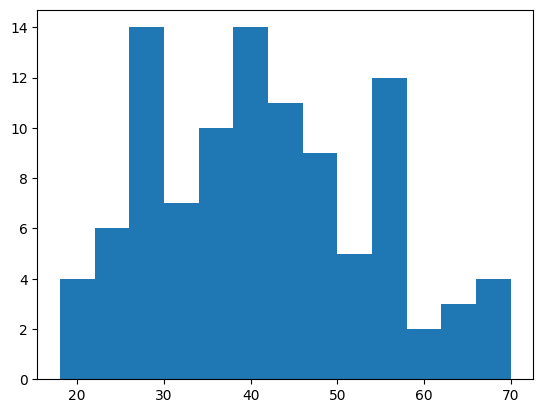

In [3]:
plt.hist(data, bins=list(range(18,73,4)))

In [17]:
interval_width = 4
_min = 18
_max = _min + interval_width
data_set = dict()
bins = 11
for item in range(bins):
    data_set[f"{_min}-{_max}"] = len([x for x in data if _min <= x <= _max])
    _min += interval_width + 1
    _max += interval_width + 1

fq_dist = {
    "interval": [],
    "frequency": []
}

for item in data_set.items():
    fq_dist["interval"].append(item[0])
    fq_dist["frequency"].append(item[1])


['18-22', '23-27', '28-32', '33-37', '38-42', '43-47', '48-52', '53-57', '58-62', '63-67', '68-72']
[6, 10, 14, 11, 19, 8, 12, 12, 4, 2, 4]


In [18]:
df = pd.DataFrame(fq_dist)
print(df)

   interval  frequency
0     18-22          6
1     23-27         10
2     28-32         14
3     33-37         11
4     38-42         19
5     43-47          8
6     48-52         12
7     53-57         12
8     58-62          4
9     63-67          2
10    68-72          4


In [32]:
df["percentage"] = (df["frequency"]/sum(df["frequency"]))*100
df["percentage"] = round(df["percentage"],1)
print(df)

   interval  frequency  percentage  cumulative_percentage
0     18-22          6         5.9                   5.88
1     23-27         10         9.8                  15.68
2     28-32         14        13.7                  29.41
3     33-37         11        10.8                  40.19
4     38-42         19        18.6                  58.82
5     43-47          8         7.8                  66.66
6     48-52         12        11.8                  78.42
7     53-57         12        11.8                  90.18
8     58-62          4         3.9                  94.10
9     63-67          2         2.0                  96.06
10    68-72          4         3.9                  99.98


In [33]:
df["cumulative_percentage"] = np.cumsum(df["percentage"])
df

,interval,frequency,percentage,cumulative_percentage
0,18-22,6,5.9,5.9
1,23-27,10,9.8,15.7
2,28-32,14,13.7,29.4
3,33-37,11,10.8,40.2
4,38-42,19,18.6,58.8
5,43-47,8,7.8,66.6
6,48-52,12,11.8,78.4
7,53-57,12,11.8,90.2
8,58-62,4,3.9,94.1
9,63-67,2,2.0,96.1


In [51]:
# Find cumulative sum
arr = list(df.percentage)
lower = arr[0]
upper = 0
cp = lower + upper
for i in arr[1:]:
    cp = lower + upper
    print(cp)
    lower = i
    upper = cp

5.9
15.700000000000001
29.4
40.2
58.800000000000004
66.60000000000001
78.4
90.2
94.10000000000001
96.10000000000001


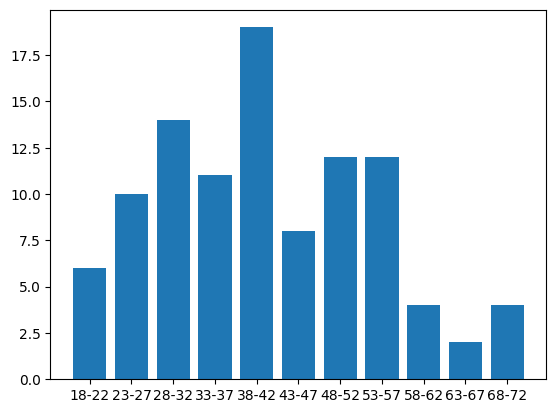

In [59]:
plt.bar(df["interval"], df["frequency"])
plt.show()